# Find the most similar job posting to our resume

## Objective 

Narrow down the set of job postings to those that are most similar to our resume in preparation for further analysis.
Workflow

## Workflow 

1. Obtain the resume from the GitHub repository. Transform job posting text and our resume into TF-IDF vectors using sklearn's TF-IDF vectorizer class.
2. Compute the cosine similarity between the vectorized resume and the job postings using sklearn's cosine similarity function.
3. Sort the job postings based on similarity to our resume, and choose an appropriate cutoff for selecting the most similar jobs. Store the most similar job postings in a new DataFrame for later use, and save the DataFrame to disk.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from jupyterthemes import jtplot
jtplot.style()

In [2]:
SRC_PATH = "../data/step1_df.pk"

In [3]:
df = pd.read_pickle(SRC_PATH)
df.head()

,title,body,bullets
8,Data Scientist II - Payment Products - Seattle...,Data Scientist II - Payment Products - Seattle...,"(Bachelor’s degree in Computer Science, Mathem..."
9,"Data Scientist - Seattle, WA","Data Scientist - Seattle, WA\nRing is looking ...",(Use predictive analytics and machine learning...
15,"Data Scientist - Jersey City, NJ 07311","Data Scientist - Jersey City, NJ 07311\nWorkin...",(Create predictive models using current and em...
18,2020 PhD Data Scientist Internship - Uber Eats...,2020 PhD Data Scientist Internship - Uber Eats...,(Develop models for user behavior and marketpl...
23,Data Analyst- Data Science & Analytics - Palo ...,Data Analyst- Data Science & Analytics - Palo ...,(Detailed and clear understanding of data used...


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_matrix = tfidf_vectorizer.fit_transform(df.body.values)
tfidf_matrix.shape

(388, 9118)

In [5]:
# Open text from CV
with open("../data/Liveproject Resume.txt","r") as f:
    my_cv = f.read()

In [6]:
input_vectorized = tfidf_vectorizer.transform([my_cv])
input_np_vectorized = input_vectorized.toarray()
input_np_vectorized.T.shape

(9118, 1)

In [7]:
cosine_similarities = tfidf_matrix @ input_np_vectorized.T
most_similar_index = np.argsort(cosine_similarities.flatten())[-1]
similarity = cosine_similarities[most_similar_index]

In [8]:
most_similar_job_offer = df.iloc[most_similar_index]

In [9]:
most_similar_job_offer

title      Post-doc: Dissemination/implementation and/or ...
body       Post-doc: Dissemination/implementation and/or ...
bullets                                                   ()
Name: 69, dtype: object

In [10]:
print("My Resume")
print(my_cv)

print("\n************* BEST JOB OFFER ******************\n")
print("Job title",most_similar_job_offer.title)

print("\nMost similar offer bullets",most_similar_job_offer.body.split(","))



My Resume
﻿Good Student
Data Scientist
	  

Good Student
123 Fake Street
Some City, QT 12345
123.456.7890
no_reply@fakesite.com
	ㅡ
Skills
	  

Python, Pandas, machine learning, natural language processing
	ㅡ
Experience
	  

Manning / Data Analyst
Oct 2019 - PRESENT,  REMOTE
Analyzed and visualized vast amounts of data using Pandas, Python, and Matplotlib.
	ㅡ
Education
	  

Berkeley / B.S. Mathematics
August 2015 - May 2019,  BERKELEY, CA
Graduated summa cum laude.

	ㅡ
Awards
	  

Tau Beta Pi Honors Society


************* BEST JOB OFFER ******************

Job title Post-doc: Dissemination/implementation and/or data science and/or sleep research - Berkeley, CA 94709

Most similar offer bullets ['Post-doc: Dissemination/implementation and/or data science and/or sleep research - Berkeley', ' CA 94709\nTo apply send a cover letter addressing the advertisement below and CV to aharvey@berkeley.edu\n\nThe Psychology Department at University of California', ' Berkeley', ' invites applications

In [11]:
df["cosine_similarity"] = cosine_similarities

## Sort job posting based on similarity and select only the most similar jobs based on a treshold

In [12]:
df_sorted = df.sort_values("cosine_similarity",ascending=False).copy()
df_sorted.reset_index(inplace=True,drop=True)
df_sorted.head()

,title,body,bullets,cosine_similarity
0,Post-doc: Dissemination/implementation and/or ...,Post-doc: Dissemination/implementation and/or ...,(),0.135607
1,Bioinformatics Associate Data Scientist - San ...,Bioinformatics Associate Data Scientist - San ...,(Work on designing and implementing a framewor...,0.109464
2,"Senior Data Scientist - Authorship - Oakland, CA","Senior Data Scientist - Authorship - Oakland, ...","(Work closely with domain experts, project eng...",0.107245
3,data scientist - United States,data scientist - United States\nJob Summary\nA...,(Excellent understanding of machine learning t...,0.107127
4,Data Scientist - United States,Data Scientist - United States\nEV Technologie...,"(Selecting features, building and optimizing c...",0.102533


#### Plot cosine similarities

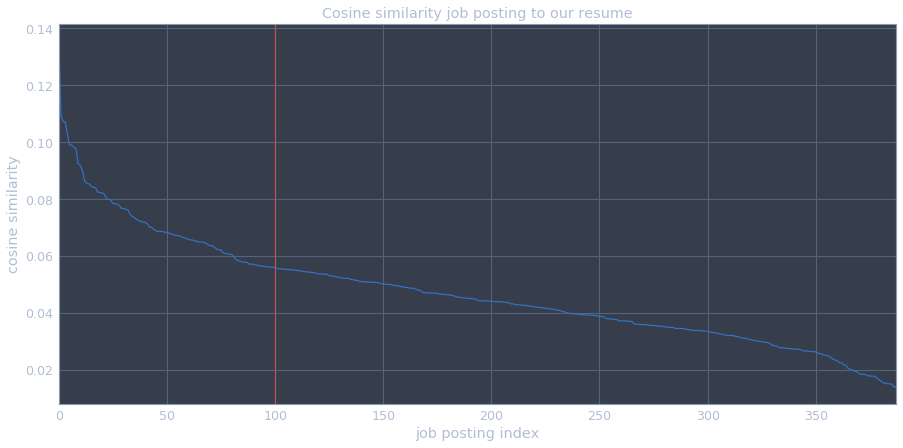

In [13]:
 ax = df_sorted.cosine_similarity.plot(
     title = "Cosine similarity job posting to our resume",
     figsize = (15,7),
     grid = "both"
)
    
_ = ax.set_xlabel("job posting index")
_ = ax.set_ylabel("cosine similarity")
_ = plt.axvline(100,c="r")

In [14]:
most_similar_df = df_sorted.iloc[:100].copy()
most_similar_df.head()

,title,body,bullets,cosine_similarity
0,Post-doc: Dissemination/implementation and/or ...,Post-doc: Dissemination/implementation and/or ...,(),0.135607
1,Bioinformatics Associate Data Scientist - San ...,Bioinformatics Associate Data Scientist - San ...,(Work on designing and implementing a framewor...,0.109464
2,"Senior Data Scientist - Authorship - Oakland, CA","Senior Data Scientist - Authorship - Oakland, ...","(Work closely with domain experts, project eng...",0.107245
3,data scientist - United States,data scientist - United States\nJob Summary\nA...,(Excellent understanding of machine learning t...,0.107127
4,Data Scientist - United States,Data Scientist - United States\nEV Technologie...,"(Selecting features, building and optimizing c...",0.102533


In [15]:
# Check filtering from 1 step. result = 100 
assert most_similar_df[most_similar_df['title'].str.contains('(data scientist)|(data science)', case=False)].shape == most_similar_df.shape

/home/michal/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [16]:
# Save to  :) 
most_similar_df.to_pickle('../data/step2_df.pk')